In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [80]:
#remove first two lines from txt files, only run once when all data is collected 
for filename in os.listdir('./SingleGanglion/datacone'):
    if filename not in os.listdir('./SingleGanglion/dataproccone') and filename[-4:]=='.txt':
        with open('./SingleGanglion/datacone/'+filename, 'r') as fin:
            data = fin.read().splitlines(True)
        with open('./SingleGanglion/dataproccone/'+filename, 'w') as fout:
            fout.writelines(data[2:])


In [72]:
for filename in os.listdir('./SingleGanglion/datacone'):
    print(filename)

0.05runCBP.txt
0.003runCBP.txt
0.01runCBP.txt
0.002runCBP.txt


3

In [81]:
rates = np.zeros((len(os.listdir('./SingleGanglion/dataproccone')),2))

for j, filename in enumerate(os.listdir('./SingleGanglion/dataproccone')):
    if filename[-4:]=='.txt':
        f = np.loadtxt('./SingleGanglion/dataproccone/'+filename)
        x = f[:,0]
        y = f[:,1]

        count = 0

        for i in range(len(x)):
            if x[i]>=400 and x[i]<=1200:
                if y[i]>y[i-1] and y[i]>y[i+1] and y[i]>10:
                    count +=1
        rates[j,0]= float(filename[:-10])
        rates[j,1]= count/0.8
    
rates = np.sort(rates, axis=0)

In [82]:
print(rates)

[[0.000e+00 0.000e+00]
 [2.000e-03 0.000e+00]
 [3.000e-03 1.250e+00]
 [1.000e-02 2.375e+01]
 [5.000e-02 6.250e+01]
 [1.000e-01 1.250e+02]]


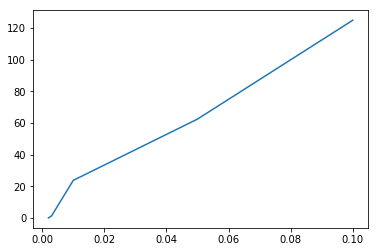

In [83]:
plt.plot(rates[1:,0], rates[1:,1])
plt.show()